# FARGOpy

## Tutorial

<a target="_blank" href="https://colab.research.google.com/github/seap-udea/fargopy/blob/main/TUTORIAL.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

We will need the following external modules for this example:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

import fargopy as fp
from fargopy import DEG, RAD
%load_ext autoreload
%autoreload 2

Running FARGOpy version 0.2.1


There are two main functionalities of `FARGOpy`:

- **Output postprocessing**: `FARGOpy` allows you to load the outputs of a simulation with `FARGO3D` and postprocess the resulting data. You may to calculate derivative quantities, plot the fields or slices of them or any other computation.

- **FARGO3D Control**: `FARGOpy` allows you to download, compile, run and control `FARGO3D`. These functionalities could be very useful if you are starting using `FARGO3D`, you do not want to bother with Linux commands or you are using the package in `Google Colab`.

- **Simulation configuration**: `FARGOpy` is also intended to create or modify `FARGO3D` setups.

### Results postprocessing

For illustrating the usage of `FARGOpy` let's get some precomputed examples:

In [3]:
fp.Simulation.download_precomputed(setup='fargo')

Precomputed output directory '/tmp/fargo' already exist


'/tmp/fargo'

Any operation in `fargopy` requires the creation of a simulation:

In [4]:
sim = fp.Simulation()

Your simulation is now connected with '/home/jzuluaga/fargo3d/'


Set the directory where the outputs are located: 

In [5]:
sim.set_output_dir('/tmp/fargo')

Now you are connected with output directory '/tmp/fargo'


List the files available in the output directory:

In [6]:
outputs = sim.list_outputs()

273 files in output directory
IDL.var, bigplanet0.dat, dims.dat, domain_x.dat, domain_y.dat, domain_z.dat, fargo, gasdens0.dat, gasdens0_2d.dat, gasdens1.dat, 
gasdens10.dat, gasdens11.dat, gasdens12.dat, gasdens13.dat, gasdens14.dat, gasdens15.dat, gasdens16.dat, gasdens17.dat, gasdens18.dat, gasdens19.dat, 
gasdens2.dat, gasdens20.dat, gasdens21.dat, gasdens22.dat, gasdens23.dat, gasdens24.dat, gasdens25.dat, gasdens26.dat, gasdens27.dat, gasdens28.dat, 
gasdens29.dat, gasdens3.dat, gasdens30.dat, gasdens31.dat, gasdens32.dat, gasdens33.dat, gasdens34.dat, gasdens35.dat, gasdens36.dat, gasdens37.dat, 
gasdens38.dat, gasdens39.dat, gasdens4.dat, gasdens40.dat, gasdens41.dat, gasdens42.dat, gasdens43.dat, gasdens44.dat, gasdens45.dat, gasdens46.dat, 
gasdens47.dat, gasdens48.dat, gasdens49.dat, gasdens5.dat, gasdens50.dat, gasdens6.dat, gasdens7.dat, gasdens8.dat, gasdens9.dat, gasenergy0.dat, 
gasenergy1.dat, gasenergy10.dat, gasenergy11.dat, gasenergy12.dat, gasenergy13.dat, gasenerg

The files describing the basic properties of the simulations are `dims.dat`, `variables.par` and `domain_*.dat`. You may load the information in these files:

In [7]:
sim.load_properties()

Loading variables
84 variables loaded
Simulation in 2 dimensions
Loading domain in cylindrical coordinates:
	Variable phi: 384 [[0, -3.1334114227210694], [-1, 3.1334114227210694]]
	Variable r: 128 [[0, 0.408203125], [-1, 2.491796875]]
	Variable z: 1 [[0, 0.0], [-1, 0.0]]
Number of snapshots in output directory: 51
Configuration variables and domains load into the object. See e.g. <sim>.vars


#### Load field data into memory

The outputs of a simulation are given as datafiles containing the value of different fields in the coordinate grid. You can load a single field:

In [8]:
gasdens0 = sim.load_field('gasdens',snapshot=0)
gasdens0, gasdens0.data.shape

([[[0.00063662 0.00063662 0.00063662 ... 0.00063662 0.00063662 0.00063662]
   [0.00063662 0.00063662 0.00063662 ... 0.00063662 0.00063662 0.00063662]
   [0.00063662 0.00063662 0.00063662 ... 0.00063662 0.00063662 0.00063662]
   ...
   [0.00063662 0.00063662 0.00063662 ... 0.00063662 0.00063662 0.00063662]
   [0.00063662 0.00063662 0.00063662 ... 0.00063662 0.00063662 0.00063662]
   [0.00063662 0.00063662 0.00063662 ... 0.00063662 0.00063662 0.00063662]]],
 (1, 128, 384))

As you can see, fields are loaded as special `Field` objects (see `fp.Field?` for a list of attributes and methods), whose most important attribute is `data` which is the `numpy` array containing the values of the field in the coordinate domain.

Vectorial fields are special cases. In `FARGO3D` each component of the field is separated by file suffixes such as `x`, `y` and `z` (even if you are working in different coordinate systems). `fargopy` is able to load all components if a vector field using:

In [9]:
vel = sim.load_field('gasv',snapshot=0,type='vector')
vel.data.shape

(2, 1, 128, 384)

As you can see, the first index correspond to the component of the field (`x` and `y` in the `FARGO3D` convention, but actually `phi` and `r` in cylindrical coordinates). The second index is the `z` coordinate, the third the `y` coordinate (`r` in the cylindrical system of coordinates) and the fourh is the `z` coordinate (`phi` in the cylindrical system of coordinates).

Depending on the size of the outputs, you can also load all physical fields in the output associated to a given fluid. Use this method with caution:

In [10]:
fields0 = sim.load_allfields('gas',snapshot=0)
fields0.keys(), fields0.size

(['gasdens', 'gasenergy', 'gasvx', 'gasvy', 'size'], 1.5)

Size here is given in Megabytes.

If you want all the fields drop the `snapshot` option (or set in `None`):

In [11]:
fields = sim.load_allfields('gas')
fields.print_keys()
fields.item('0').keys(), fields.size

0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 
18, 19, 2, 20, 21, 22, 23, 24, 25, 26, 
27, 28, 29, 3, 30, 31, 32, 33, 34, 35, 
36, 37, 38, 39, 4, 40, 41, 42, 43, 44, 
45, 46, 47, 48, 49, 5, 50, 6, 7, 8, 
9, snapshots, size


(['gasdens', 'gasenergy', 'gasvx', 'gasvy'], 76.5)

In [12]:
fields.item('0').gasdens.data.shape

(1, 128, 384)

As you may see, the size of the fields start to be considerable large (36 MB in this case), so it is important to not abusing of this command.

#### Field slices

Once you have loaded a given field you may want to extract a slice for plotting. Let's for instance plot the density as a function of distance in the example simulation at a given snapshot:

In [13]:
gasdens10 = sim.load_field('gasdens',snapshot=10)
gasdens10.data.shape

(1, 128, 384)

Let's extract the density of the gas at `phi=0` and `z=0`:

In [14]:
gasdens_r = gasdens10.slice(phi=0,z=0)
gasdens_r.shape

(128,)

And plot:

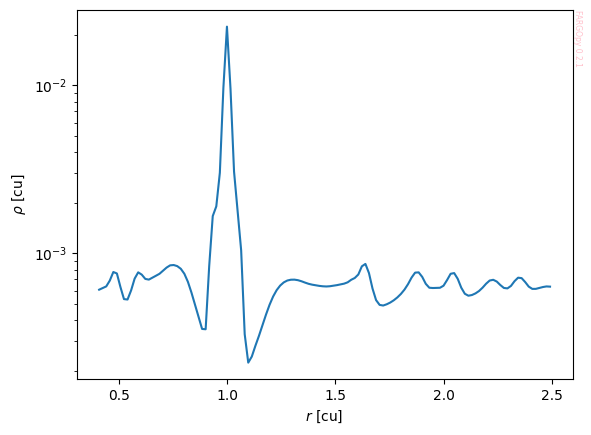

In [15]:
fig,ax = plt.subplots()
ax.semilogy(sim.domains.r,gasdens_r)
ax.set_xlabel(r"$r$ [cu]")
ax.set_ylabel(r"$\rho$ [cu]")
fp.Util.fargopy_mark(ax);

We can do this in a single step with `fargopy`:

In [16]:
gasdens, mesh = gasdens10.meshslice(slice='z=0,phi=0')

The object `mesh` now contains matrices of the coordinates:

In [17]:
mesh.keys()

['r', 'phi', 'x', 'y', 'z']

If you are plotting `r` vs. `gasdens` the plot will be:

Text(1, 1, 'FARGOpy 0.2.1')

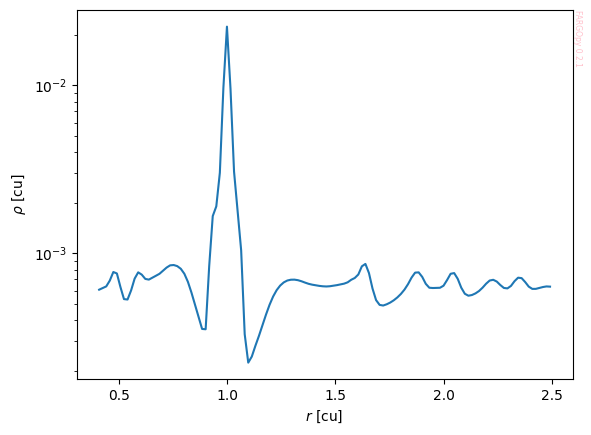

In [18]:
fig,ax = plt.subplots()
ax.semilogy(mesh.r,gasdens)
ax.set_xlabel(r"$r$ [cu]")
ax.set_ylabel(r"$\rho$ [cu]")
fp.Util.fargopy_mark(ax)

This simple procedure reduce considerably the creation of more complex plots, for instance, a map of the density in different planes:

In [19]:
gasdens, mesh = gasdens10.meshslice(slice='z=0')

And plot it:

(-2.5002509788199982, 2.499916334793502, -2.499916334793502, 2.499916334793502)

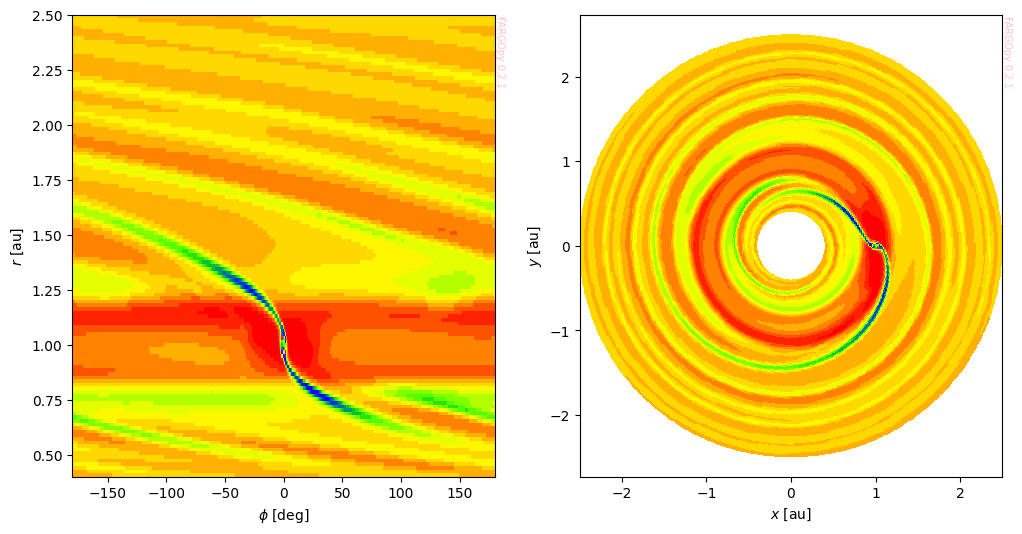

In [20]:
fig,axs = plt.subplots(1,2,figsize=(12,6))

ax = axs[0]
ax.pcolormesh(mesh.phi*RAD,mesh.r*sim.UL/fp.AU,gasdens,cmap='prism')
ax.set_xlabel('$\phi$ [deg]')
ax.set_ylabel('$r$ [au]')
fp.Util.fargopy_mark(ax)

ax = axs[1]
ax.pcolormesh(mesh.x*sim.UL/fp.AU,mesh.y*sim.UL/fp.AU,
              gasdens,cmap='prism')
ax.set_xlabel('$x$ [au]')
ax.set_ylabel('$y$ [au]')
fp.Util.fargopy_mark(ax)
ax.axis('equal')

Let's create an animation for illustrating how easy `FARGOpy` make life:

Your simulation is now connected with '/home/jzuluaga/fargo3d/'
Now you are connected with output directory '/tmp/fargo'
Loading variables
84 variables loaded
Simulation in 2 dimensions
Loading domain in cylindrical coordinates:
	Variable phi: 384 [[0, -3.1334114227210694], [-1, 3.1334114227210694]]
	Variable r: 128 [[0, 0.408203125], [-1, 2.491796875]]
	Variable z: 1 [[0, 0.0], [-1, 0.0]]
Number of snapshots in output directory: 51
Configuration variables and domains load into the object. See e.g. <sim>.vars


  0%|          | 0/51 [00:00<?, ?it/s]

100%|██████████| 51/51 [00:00<00:00, 60.30it/s]
MovieWriter ffmpeg unavailable; using Pillow instead.


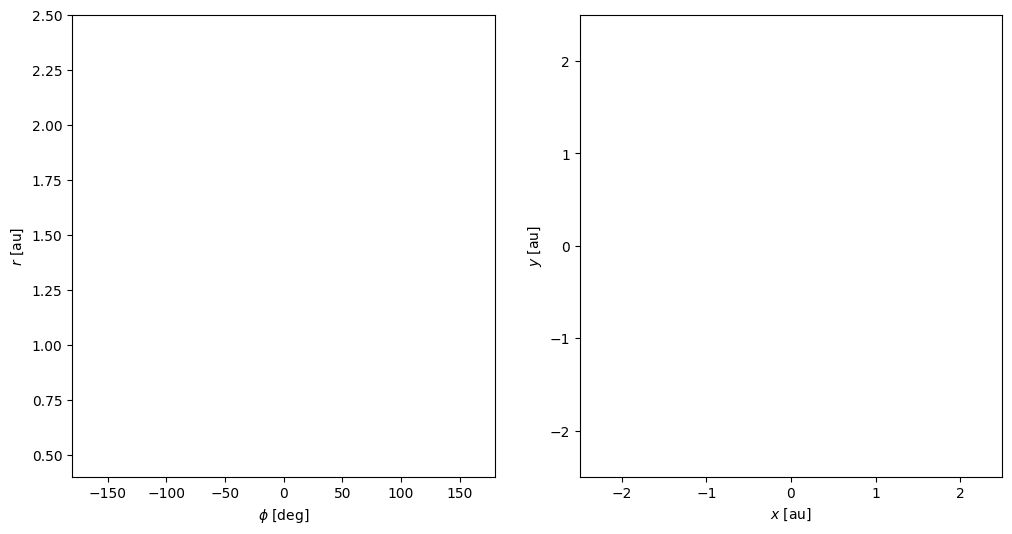

In [21]:
from celluloid import Camera
from tqdm import tqdm

sim = fp.Simulation()
sim.set_output_dir('/tmp/fargo')
sim.load_properties()

gasdens_all = sim.load_allfields('gasdens')
fig,axs = plt.subplots(1,2,figsize=(12,6))

cmap = 'prism'
camera = Camera(fig)
for snapshot in tqdm(gasdens_all.snapshots):
    gasdens_snap = gasdens_all.item(str(snapshot)).gasdens
    gasdens,mesh = gasdens_snap.meshslice(slice='z=0')

    ax = axs[0]
    ax.pcolormesh(mesh.phi*RAD,mesh.r*sim.UL/fp.AU,gasdens,cmap=cmap)
    ax.set_xlabel('$\phi$ [deg]')
    ax.set_ylabel('$r$ [au]')

    ax = axs[1]
    ax.pcolormesh(mesh.x*sim.UL/fp.AU,mesh.y*sim.UL/fp.AU,gasdens,cmap=cmap)
    ax.set_xlabel('$x$ [au]')
    ax.set_ylabel('$y$ [au]')
    fp.Util.fargopy_mark(ax)

    camera.snap()

animation = camera.animate()
animation.save('gallery/fargo-animation.gif')

### Control

Before starting you need a local copy of `FARGO3D`. For getting a copy use:

In [22]:
fp.initialize('download')

	FARGO3D directory already present in '/home/jzuluaga/fargo3d/'
Header file for FARGO3D is in the fargo directory /home/jzuluaga/fargo3d/


Create the simulation object:

In [23]:
sim = fp.Simulation()

Your simulation is now connected with '/home/jzuluaga/fargo3d/'


> **NOTE**: If you already have a copy of `FARGO3D` you may configure the location using the method of the simulation object `sim.set_fargo3d_dir(<your_fargo3d_location>)`

In [24]:
sim.set_fargo3d_dir('/home/jzuluaga/fargo3d')

Your simulation is now connected with '/home/jzuluaga/fargo3d'


Once you have connected your simulation you must choose your setup:

In [25]:
sim.set_setup('fargo')

Now your simulation setup is at '/home/jzuluaga/fargo3d/setups/fargo'


'fargo'

Now you can check the properties of the simulation:

In [27]:
print(sim)

Simulation information:
    FARGO3D directory: /home/jzuluaga/fargo3d
        Outputs: /home/jzuluaga/fargo3d/outputs
        Setups: /home/jzuluaga/fargo3d/setups
    Units:
        G = 1 UL^3/(UM UT^2)
        UL, UM, UT = 14959800000000.0 m, 1.9891e+33 kg, 5022421.439871778 s
        UE = 5271139.687948494 J/m^3
        UV = 2978603.086001067 m/s
        URHO = 5.941269533317109e-07 kg/m^3
        USIGMA = 8888020.39645173 kg/m^2
    Setup: fargo
    Setup directory: /home/jzuluaga/fargo3d/setups/fargo
    Output directory: None



You may abbreviate the previous commands using from the beginning:

In [28]:
sim = fp.Simulation(fargo3d_dir='/home/jzuluaga/fargo3d',setup='fargo')
sim

Your simulation is now connected with '/home/jzuluaga/fargo3d'
Now your simulation setup is at '/home/jzuluaga/fargo3d/setups/fargo'


Simulation information:
    FARGO3D directory: /home/jzuluaga/fargo3d
        Outputs: /home/jzuluaga/fargo3d/outputs
        Setups: /home/jzuluaga/fargo3d/setups
    Units:
        G = 1 UL^3/(UM UT^2)
        UL, UM, UT = 14959800000000.0 m, 1.9891e+33 kg, 5022421.439871778 s
        UE = 5271139.687948494 J/m^3
        UV = 2978603.086001067 m/s
        URHO = 5.941269533317109e-07 kg/m^3
        USIGMA = 8888020.39645173 kg/m^2
    Setup: fargo
    Setup directory: /home/jzuluaga/fargo3d/setups/fargo
    Output directory: None

Now you can compile `FARGO3D` using a given setup:

In [32]:
sim.compile(setup='fargo',parallel=0,gpu=0,force=True)

Now your simulation setup is at '/home/jzuluaga/fargo3d/setups/fargo'
Cleaning FARGO3D directory /home/jzuluaga/fargo3d...
Compiling fargo3d_SETUP-fargo_PARALLEL-0_GPU-0...
Succesful compilation of FARGO3D binary fargo3d_SETUP-fargo_PARALLEL-0_GPU-0


True

If successful, you may run the simulation:

In [33]:
sim.run(cleanrun=True)

Cleaning output directory /home/jzuluaga/fargo3d/outputs/fargo
Running asynchronously (test = False):  ./fargo3d_SETUP-fargo_PARALLEL-0_GPU-0 -m -t setups/fargo/fargo.par
Now you are connected with output directory '/home/jzuluaga/fargo3d/outputs/fargo'


Once running, check the status:

In [34]:
sim.status()


################################################################################
Running status of the process:
	The process is running.


There are several ways to check the status. This way will allow you to check the status in real time:

In [35]:
sim.status('progress')

OUTPUTS 3 at date t = 18.849556 OK [output pace = 0.1 secs]
OUTPUTS 4 at date t = 25.132741 OK [output pace = 0.1 secs]
OUTPUTS 5 at date t = 31.415927 OK [output pace = 0.9 secs]
OUTPUTS 6 at date t = 37.699112 OK [output pace = 1.9 secs]
OUTPUTS 7 at date t = 43.982297 OK [output pace = 1.9 secs]
OUTPUTS 8 at date t = 50.265482 OK [output pace = 1.9 secs]
OUTPUTS 9 at date t = 56.548668 OK [output pace = 1.9 secs]
OUTPUTS 10 at date t = 62.831853 OK [output pace = 1.9 secs]
OUTPUTS 11 at date t = 69.115038 OK [output pace = 1.9 secs]
OUTPUTS 12 at date t = 75.398224 OK [output pace = 1.9 secs]
OUTPUTS 13 at date t = 81.681409 OK [output pace = 1.0 secs]
OUTPUTS 14 at date t = 87.964594 OK [output pace = 2.0 secs]
OUTPUTS 15 at date t = 94.247780 OK [output pace = 2.0 secs]
OUTPUTS 16 at date t = 100.530965 OK [output pace = 2.0 secs]
OUTPUTS 17 at date t = 106.814150 OK [output pace = 2.0 secs]
OUTPUTS 18 at date t = 113.097336 OK [output pace = 2.0 secs]
OUTPUTS 19 at date t = 119.3

You may stop the simulation:

In [36]:
sim.stop()

Stopping FARGO3D process (pid = 9809)


Once stopped you may resume it:

In [40]:
sim.resume()

The process has ended with termination code 0.


In [39]:
sim.status('progress')

The simulation is not running anymore


This will resume the simulation from the *latest resumable snapshot*. You may also resume from a different snapshot using: 